# Coreference Resolution

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/coref](https://github.com/huseinzol05/Malaya/tree/master/example/coref).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

### What is Coreference Resolution?

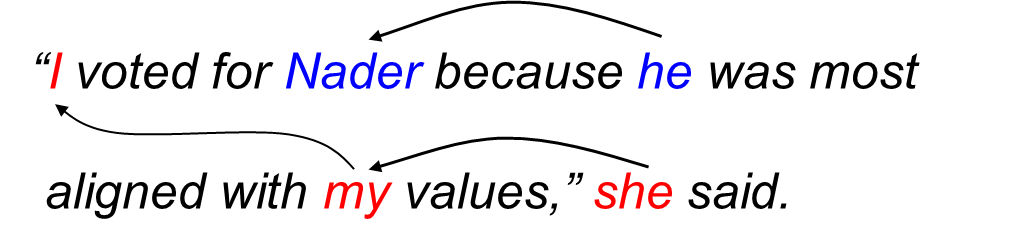

In [1]:
from IPython.core.display import Image, display

display(Image('https://nlp.stanford.edu/projects/corefexample.png', width=500))

Kakak mempunyai kucing. Dia menyayanginya. Dia -> Kakak, nya -> kucing

Husein Zolkepli suka makan ayam. Dia pun suka makan daging. Dia -> Husein Zolkepli

In [2]:
%%time
import malaya

CPU times: user 5.25 s, sys: 936 ms, total: 6.19 s
Wall time: 6.79 s


### Load dependency models

In [3]:
model = malaya.dependency.transformer(model = 'albert')
alxlnet = malaya.dependency.transformer(model = 'tiny-albert')

### Resolve coreference clusters using dependency parsing

```python
def parse_from_dependency(models, string: str,
                          references: List[str] = ['dia', 'itu', 'ini', 'saya', 'awak', 'kamu', 'kita', 'kami', 'mereka'],
                          rejected_references: List[str] = ['saya', 'awak', 'kamu', 'kita', 'kami', 'mereka'],
                          acceptable_subjects: List[str] = ['flat', 'subj', 'nsubj', 'csubj', 'obl', 'obj'],
                          acceptable_nested_subjects: List[str] = ['compound', 'flat'],
                          split_nya: bool = True,
                          aggregate: Callable = np.mean,
                          top_k: int = 20):
    """
    Apply Coreference Resolution using stacks of dependency models.

    Parameters
    ----------
    models: list
        list of dependency models, must has `vectorize` method.
    string: str
    references: List[str], optional (default=['dia', 'itu', 'ini', 'saya', 'awak', 'kamu', 'kita', 'kami', 'mereka'])
        list of references.
    rejected_references: List[str], optional (default=['saya', 'awak', 'kamu', 'kita', 'kami', 'mereka'])
        list of rejected references during populating subjects.
    acceptable_subjects:List[str], optional
        List of dependency labels for subjects.
    acceptable_nested_subjects: List[str], optional
        List of dependency labels for nested subjects, eg, syarikat (obl) facebook (compound).
    split_nya: bool, optional (default=True)
        split `nya`, eg, `disifatkannya` -> `disifatkan`, `nya`.
    aggregate: Callable, optional (default=numpy.mean)
        Aggregate function to aggregate list of vectors from `model.vectorize`.
    top_k: int, optional (default=20)
        only accept near top_k to assume a coherence.

    Returns
    -------
    result: Dict[text, coref]
        {'text': ['Husein','Zolkepli','suka','makan','ayam','.','Dia','pun','suka','makan','daging','.'],
        'coref': {6: {'index': [0, 1], 'text': ['Husein', 'Zolkepli']}}}
    """
```

In [15]:
string = 'Husein Zolkepli suka makan ayam. Dia pun suka makan daging.'
string1 = 'Kakak mempunyai kucing. Dia menyayanginya.'

# https://www.malaysiakini.com/news/580044
string2 = 'Pengerusi PKR Terengganu Azan Ismail menyelar pemimpin PAS yang disifatkannya sebagai membisu mengenai gesaan mengadakan sidang Dewan Undangan Negeri (DUN) di negeri yang dipimpin parti mereka.'

# https://www.sinarharian.com.my/article/146270/EDISI/Tiada-isu-penjualan-vaksin-Covid-19-di-Kelantan
string3 = 'Kota Bharu - Polis Kelantan mengesahkan masih belum menerima sebarang laporan berkaitan isu penjualan vaksin tidak sah berlaku di negeri ini. Timbalan Ketua Polis Kelantan, Senior Asisten Komisioner Abdullah Mohammad Piah berkata, bagaimanapun pihaknya sedia menjalankan siasatan lanjut jika menerima laporan berkaitan perkara itu.'

In [8]:
%%time

malaya.coref.parse_from_dependency([model], string)

CPU times: user 434 ms, sys: 87.3 ms, total: 521 ms
Wall time: 126 ms


{'text': ['Husein',
  'Zolkepli',
  'suka',
  'makan',
  'ayam',
  '.',
  'Dia',
  'pun',
  'suka',
  'makan',
  'daging',
  '.'],
 'coref': {6: {'index': [0, 1], 'text': ['Husein', 'Zolkepli']}}}

In [9]:
%%time

malaya.coref.parse_from_dependency([model], string1)

CPU times: user 373 ms, sys: 76 ms, total: 449 ms
Wall time: 108 ms


{'text': ['Kakak',
  'mempunyai',
  'kucing',
  '.',
  'Dia',
  'menyayangi',
  'nya',
  '.'],
 'coref': {4: {'index': [0], 'text': ['Kakak']},
  6: {'index': [2], 'text': ['kucing']}}}

In [10]:
%%time

malaya.coref.parse_from_dependency([model], string2)

CPU times: user 673 ms, sys: 196 ms, total: 869 ms
Wall time: 197 ms


{'text': ['Pengerusi',
  'PKR',
  'Terengganu',
  'Azan',
  'Ismail',
  'menyelar',
  'pemimpin',
  'PAS',
  'yang',
  'disifatkan',
  'nya',
  'sebagai',
  'membisu',
  'mengenai',
  'gesaan',
  'mengadakan',
  'sidang',
  'Dewan',
  'Undangan',
  'Negeri',
  '(',
  'DUN',
  ')',
  'di',
  'negeri',
  'yang',
  'dipimpin',
  'parti',
  'mereka',
  '.'],
 'coref': {10: {'index': [6, 7], 'text': ['pemimpin', 'PAS']},
  28: {'index': [16, 17, 18, 19],
   'text': ['sidang', 'Dewan', 'Undangan', 'Negeri']}}}

In [16]:
%%time

malaya.coref.parse_from_dependency([model], string3)

CPU times: user 738 ms, sys: 183 ms, total: 922 ms
Wall time: 207 ms


{'text': ['Kota',
  'Bharu',
  '-',
  'Polis',
  'Kelantan',
  'mengesahkan',
  'masih',
  'belum',
  'menerima',
  'sebarang',
  'laporan',
  'berkaitan',
  'isu',
  'penjualan',
  'vaksin',
  'tidak',
  'sah',
  'berlaku',
  'di',
  'negeri',
  'ini',
  '.',
  'Timbalan',
  'Ketua',
  'Polis',
  'Kelantan',
  ',',
  'Senior',
  'Asisten',
  'Komisioner',
  'Abdullah',
  'Mohammad',
  'Piah',
  'berkata',
  ',',
  'bagaimanapun',
  'pihak',
  'nya',
  'sedia',
  'menjalankan',
  'siasatan',
  'lanjut',
  'jika',
  'menerima',
  'laporan',
  'berkaitan',
  'perkara',
  'itu',
  '.'],
 'coref': {20: {'index': [12], 'text': ['isu']},
  37: {'index': [28, 29, 30, 31, 32],
   'text': ['Asisten', 'Komisioner', 'Abdullah', 'Mohammad', 'Piah']},
  47: {'index': [40], 'text': ['siasatan']}}}